# SVO Networks

This notebook is strictly an archive of the small block of code in the SVO work that attempted a network.

In [1]:
# IMPORTS
import pandas as pd
import networkx as nx
import numpy as np
import plotly.graph_objects as go

In [2]:
# LOAD DATAFRAMES
svos_m = pd.read_csv("../output/svos_m_lem.csv", index_col=0)
svos_w = pd.read_csv("../output/svos_w_lem.csv", index_col=0)

print(svos_m.shape[0], svos_w.shape[0])

80460 26610


## Subjects

The function below allows us to compare the usage of subjects across the two subcorpora, returning both a raw count and a percentage of the SVO count of the subcorpus.

In [63]:
def compare (subject):
    # Create name:
    m_tmp = svos_m[svos_m["subject"] == subject]
    w_tmp = svos_w[svos_w["subject"] == subject]
    print(f'''
    | ♂︎ | "{subject}" | {m_tmp.shape[0]} | {m_tmp.shape[0]/svos_m.shape[0]:.3f} |
    | ♀︎ | "{subject}" | {w_tmp.shape[0]} | {w_tmp.shape[0]/svos_w.shape[0]:.3f} |''')
    
compare("he")


    | ♂︎ | "he" | 2548 | 0.032 |
    | ♀︎ | "he" | 757 | 0.028 |


### Third Person Perspective

In [64]:
thirdPerson = ['he', 'she', 'man', 'woman', 'men', 'women', 'actor', 'actress']

for i in thirdPerson:
    compare(i)


    | ♂︎ | "he" | 2548 | 0.032 |
    | ♀︎ | "he" | 757 | 0.028 |

    | ♂︎ | "she" | 848 | 0.011 |
    | ♀︎ | "she" | 643 | 0.024 |

    | ♂︎ | "man" | 80 | 0.001 |
    | ♀︎ | "man" | 13 | 0.000 |

    | ♂︎ | "woman" | 24 | 0.000 |
    | ♀︎ | "woman" | 35 | 0.001 |

    | ♂︎ | "men" | 40 | 0.000 |
    | ♀︎ | "men" | 23 | 0.001 |

    | ♂︎ | "women" | 37 | 0.000 |
    | ♀︎ | "women" | 62 | 0.002 |

    | ♂︎ | "actor" | 3 | 0.000 |
    | ♀︎ | "actor" | 1 | 0.000 |

    | ♂︎ | "actress" | 0 | 0.000 |
    | ♀︎ | "actress" | 0 | 0.000 |


### First & Second Person

In [65]:
firstSecond = ["i", "we", "you"]

for i in firstSecond:
    compare(i)


    | ♂︎ | "i" | 15440 | 0.192 |
    | ♀︎ | "i" | 6185 | 0.232 |

    | ♂︎ | "we" | 15458 | 0.192 |
    | ♀︎ | "we" | 4652 | 0.175 |

    | ♂︎ | "you" | 11949 | 0.149 |
    | ♀︎ | "you" | 3117 | 0.117 |


### Other Subjects

In [66]:
# This is just a placeholder for more interesting words
otherSubjects =  ['subject', 'object']

for i in otherSubjects:
    compare(i)


    | ♂︎ | "subject" | 9 | 0.000 |
    | ♀︎ | "subject" | 2 | 0.000 |

    | ♂︎ | "object" | 7 | 0.000 |
    | ♀︎ | "object" | 5 | 0.000 |


## Verbs

We need either a collection of dataframes or one dataframe which has just the subjects above along with the most common verbs: this will give us a sense of the actions associated with particular subjects, the active spaces characters occupy.

The first thing we need to do is get a count of the unique verbs available in each of the subcorpora:

In [70]:
# Unique verbs in mens' subcorpus
verbs_m = svos_m.groupby(
    ["verb"]).size().reset_index(name="count").sort_values(["count"], ascending=False)
verbs_m.shape

(2631, 2)

In [71]:
# Unique verbs in womens' subcorpus
verbs_w = svos_w.groupby(
    ["verb"]).size().reset_index(name="count").sort_values(["count"], ascending=False)
verbs_w.shape

(1687, 2)

In [72]:
# Verbs that occur more than once
verbs_m_gt1 = verbs_m.loc[verbs_m["count"] > 1]
verbs_w_gt1 = verbs_w.loc[verbs_w["count"] > 1]
print(f"Unique verbs for ♂︎ - {verbs_m_gt1.shape[0]}; ♀︎ - {verbs_w_gt1.shape[0]}.")

Unique verbs for ♂︎ - 1672; ♀︎ - 995.


In [73]:
# Verbs that occur more than twice
verbs_m_gt2 = verbs_m.loc[verbs_m["count"] > 2]
verbs_w_gt2 = verbs_w.loc[verbs_w["count"] > 2]
print(f"Verbs that occur more than twice: for ♂︎ - {verbs_m_gt2.shape[0]}; ♀︎ - {verbs_w_gt2.shape[0]}.")

Verbs that occur more than twice: for ♂︎ - 1317; ♀︎ - 743.


In [74]:
# This gives us the top 20 verbs associated with "he" in the mens subcorpus
m_he = svos_m[svos_m["subject"] == "he"].groupby(["verb"]).size().reset_index(
    name='obs').sort_values(['obs'], ascending=False).iloc[:20]
m_he

,verb,obs
200,have,232
387,say,132
125,do,111
188,get,90
190,go,78
450,take,78
494,want,71
259,make,67
455,tell,58
336,put,54


Below is my attempt to create a function that would return an appropriately named dataframe which contained the top 20 verbs for a given subject. It was intended to be worked into a `for` loop:
```python
genderedSubjects = ['she', 'he', 'man', 'men', 'woman', 'women']
for i in genderedSubjects:
    verbCount(svos_w, "w", i, 30)
```
But it doesn't work as intended, creating a bunch of smaller dataframes, as a print statement reveals:
```python
print(w_man)
```
```
NameError: name 'w_man' is not defined
```

We can either run this code a dataframe at a time or go with something more pandas-y.

One approach might look like this:

In [78]:
svos_m_pro = svos_m.loc[(
    svos_m['subject'] == 'he') | (
    svos_m['subject'] == 'she') | (
    svos_m["subject"] == "i")
]
svos_m_pro.shape

(18836, 3)

Another approach would take advantage of pandas `subset` functionality. Used on the entire mens subcorpus, it suggests that the most common subject-verb pairing is *we have*, by a pretty large margin, so let's mark that as something worth exploring further.

<div class="alert alert-block alert-warning"> <b>TO DO</b>: Take a look at "we have" in the mens subcorpus. </div>

In [80]:
svos_m.value_counts(subset=['subject', 'verb'])

subject  verb       
we       have           2259
you      have           1505
i        have           1318
         want           1210
         go             1076
                        ... 
it       manufacture       1
         market            1
         maxes             1
         maximize          1
number   know              1
Length: 19993, dtype: int64

In [79]:
# Create a list of the pronouns we want to see
pronouns = ["he", "she", "i"]

# Here's the code all in one block
m_pronouns = svos_m[svos_m["subject"].isin(
    pronouns)].value_counts(
    subset=['subject', 'verb']).reset_index()
m_pronouns.head()

,subject,verb,0
0,i,have,1318
1,i,want,1210
2,i,go,1076
3,i,do,650
4,i,get,586


In [50]:
# svos_m_iheshe.to_csv("../output/m_iheshe.csv")

In [58]:
m_pronouns.rename(columns={0:'v_count'}, inplace=True)
m_pronouns.head()

,subject,verb,v_count
0,i,have,1318
1,i,want,1210
2,i,go,1076
3,i,do,650
4,i,get,586


In [59]:
m_pronouns.shape

(1723, 3)

In [61]:
m_pronouns['v_freq'] = m_pronouns['v_count'] / m_pronouns['v_count'].sum()

In [62]:
m_pronouns.head()

,subject,verb,v_count,v_freq
0,i,have,1318,0.069972
1,i,want,1210,0.064239
2,i,go,1076,0.057125
3,i,do,650,0.034508
4,i,get,586,0.031111


## SVO Networks

### A Small Test Network

While we eventually might like to have a network of `subject > verb > object` for now, let's work with the `m_she` dataframe and build a network with sources, targets, and edge attributes.

In [11]:
# Re-insert a column for "she"
m_she["subject"] = "she"

# Re-arrange columns so that they are in a more obvious order
m_she = m_she[["subject", "verb", "obs"]]

m_she.shape

(40, 3)

In [12]:
# Create the graph
# Reference: https://stackoverflow.com/questions/53937259/converting-a-pandas-dataframe-to-a-networkx-graph
G = nx.from_pandas_edgelist(m_she, source='subject', target='verb', edge_attr=True)

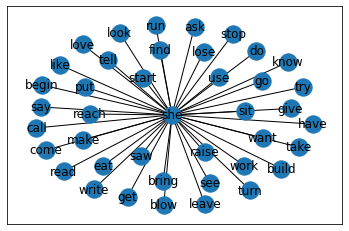

In [13]:
nx.draw_networkx(G)

This is not a very clear graph, and, honestly, I think we would rather be able to choose the number of nodes at the network level rather than at the dataframe level: being able to adjust the network visualization is a real boon.

In [14]:
G.edges.data()

EdgeDataView([('she', 'have', {'obs': 94}), ('she', 'say', {'obs': 47}), ('she', 'do', {'obs': 41}), ('she', 'go', {'obs': 34}), ('she', 'want', {'obs': 32}), ('she', 'get', {'obs': 24}), ('she', 'take', {'obs': 23}), ('she', 'give', {'obs': 21}), ('she', 'tell', {'obs': 20}), ('she', 'find', {'obs': 19}), ('she', 'start', {'obs': 17}), ('she', 'make', {'obs': 16}), ('she', 'try', {'obs': 15}), ('she', 'use', {'obs': 11}), ('she', 'bring', {'obs': 11}), ('she', 'know', {'obs': 10}), ('she', 'see', {'obs': 9}), ('she', 'saw', {'obs': 9}), ('she', 'come', {'obs': 8}), ('she', 'stop', {'obs': 8}), ('she', 'ask', {'obs': 8}), ('she', 'leave', {'obs': 7}), ('she', 'read', {'obs': 7}), ('she', 'eat', {'obs': 6}), ('she', 'write', {'obs': 6}), ('she', 'call', {'obs': 6}), ('she', 'like', {'obs': 5}), ('she', 'lose', {'obs': 5}), ('she', 'put', {'obs': 5}), ('she', 'sit', {'obs': 5}), ('she', 'reach', {'obs': 5}), ('she', 'look', {'obs': 5}), ('she', 'build', {'obs': 5}), ('she', 'raise', {'ob